In [1]:
# 周内效应
import pandas as pd
import matplotlib.pyplot as plt
import akshare as ak
import datetime

In [4]:
sh000001 = ak.stock_zh_index_daily(symbol="sh000001")

In [ ]:
sh000300 = ak.stock_zh_index_daily(symbol="sh000300")

In [59]:
sh000300["pct_change"] =  sh000300["close"].pct_change()

In [60]:
sh000300["week_day"] =  sh000300["date"].map(lambda x: x.isoweekday())

In [3]:
sh000300

NameError: name 'sh000300' is not defined

In [22]:
sh000300[:100].groupby("week_day")['pct_change'].describe()

,count,mean,std,min,25%,50%,75%,max
week_day,,,,,,,,
1,20.0,-0.005795,0.020942,-0.064395,-0.012385,-0.001606,0.005981,0.018628
2,20.0,0.003115,0.014280,-0.016754,-0.006421,0.000642,0.010492,0.031814
3,20.0,-0.000716,0.019162,-0.024104,-0.014209,-0.002299,0.005255,0.065910
4,20.0,0.005723,0.024461,-0.041376,-0.009048,0.002272,0.021116,0.066243
5,19.0,-0.004849,0.013277,-0.028884,-0.012713,-0.004779,0.003758,0.017665


In [27]:
weekday_num = sh000300.groupby("week_day")['pct_change'].size()

In [57]:
sh000300 = sh000300

In [28]:
weekday_up_num = sh000300[sh000300["pct_change"]>0].groupby("week_day")['pct_change'].size()

In [29]:
weekday_up_num/weekday_num

week_day
1    0.559426
2    0.560878
3    0.507921
4    0.457086
5    0.540241
Name: pct_change, dtype: float64

In [53]:
sh000300_w1 = sh000300[sh000300["week_day"] == 1]
sh000300_w2 = sh000300[sh000300["week_day"] == 2]
sh000300_w3 = sh000300[sh000300["week_day"] == 3]
sh000300_w4 = sh000300[sh000300["week_day"] == 4]
sh000300_w5 = sh000300[sh000300["week_day"] == 5]

In [54]:
sh000300["pro_w1"] = (sh000300_w1["pct_change"] +1).cumprod()
sh000300["pro_w2"] = (sh000300_w2["pct_change"] +1).cumprod()
sh000300["pro_w3"] = (sh000300_w3["pct_change"] +1).cumprod()
sh000300["pro_w4"] = (sh000300_w4["pct_change"] +1).cumprod()
sh000300["pro_w5"] = (sh000300_w5["pct_change"] +1).cumprod()

In [55]:
sh000300

,date,open,high,low,close,volume,pct_change,week_day,pro_w1,pro_w2,pro_w3,pro_w4,pro_w5
4000,2018-07-03,3410.477,3422.040,3319.289,3409.280,9527869300,0.000386,2,NaN,1.000386,NaN,NaN,NaN
4001,2018-07-04,3398.779,3418.331,3359.086,3363.747,7515799700,-0.013356,3,NaN,NaN,0.986644,NaN,NaN
4002,2018-07-05,3365.555,3398.485,3330.711,3342.438,8158798100,-0.006335,4,NaN,NaN,NaN,0.993665,NaN
4003,2018-07-06,3347.062,3396.246,3295.730,3365.123,8609757900,0.006787,5,NaN,NaN,NaN,NaN,1.006787
4004,2018-07-09,3378.906,3459.315,3378.906,3459.184,7660154500,0.027952,1,1.027952,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4979,2022-07-14,4308.823,4352.098,4292.760,4322.074,14525092600,0.000142,4,NaN,NaN,NaN,0.865141,NaN
4980,2022-07-15,4299.471,4344.857,4248.527,4248.527,15021445300,-0.017017,5,NaN,NaN,NaN,NaN,1.123375
4981,2022-07-18,4262.154,4300.778,4217.506,4292.586,12260119200,0.010370,1,1.121595,NaN,NaN,NaN,NaN
4982,2022-07-19,4288.444,4288.444,4238.824,4269.340,10380573000,-0.005415,2,NaN,1.234344,NaN,NaN,NaN


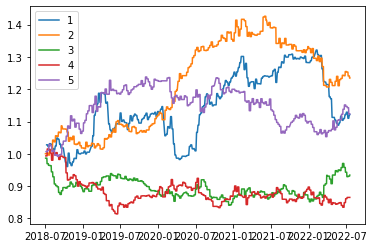

In [56]:
plt.plot(sh000300["date"], sh000300["pro_w1"].fillna(method="ffill"), label="1")
plt.plot(sh000300["date"], sh000300["pro_w2"].fillna(method="ffill"), label="2")
plt.plot(sh000300["date"], sh000300["pro_w3"].fillna(method="ffill"), label="3")
plt.plot(sh000300["date"], sh000300["pro_w4"].fillna(method="ffill"), label="4")
plt.plot(sh000300["date"], sh000300["pro_w5"].fillna(method="ffill"), label="5")
plt.legend(loc="best")


In [63]:
sh000300["m20"] = sh000300["close"].rolling(20, min_periods=1).mean()

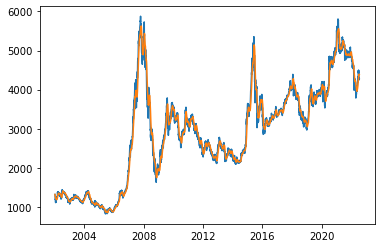

In [67]:
plt.plot(sh000300["date"], sh000300["close"])
plt.plot(sh000300["date"], sh000300["m20"])

In [69]:
sh000300

,date,open,high,low,close,volume,pct_change,week_day,m20
0,2002-01-04,1316.455,1316.455,1316.455,1316.455,0,NaN,5,1316.45500
1,2002-01-07,1302.084,1302.084,1302.084,1302.084,0,-0.010916,1,1309.26950
2,2002-01-08,1292.714,1292.714,1292.714,1292.714,0,-0.007196,2,1303.75100
3,2002-01-09,1272.645,1272.645,1272.645,1272.645,0,-0.015525,3,1295.97450
4,2002-01-10,1281.261,1281.261,1281.261,1281.261,0,0.006770,4,1293.03180
...,...,...,...,...,...,...,...,...,...
4979,2022-07-14,4308.823,4352.098,4292.760,4322.074,14525092600,0.000142,4,4393.78735
4980,2022-07-15,4299.471,4344.857,4248.527,4248.527,15021445300,-0.017017,5,4390.76150
4981,2022-07-18,4262.154,4300.778,4217.506,4292.586,12260119200,0.010370,1,4388.86915
4982,2022-07-19,4288.444,4288.444,4238.824,4269.340,10380573000,-0.005415,2,4386.05785


In [73]:
sh300up = sh000300[sh000300["close"] >  sh000300["m20"]]
sh300down = sh000300[sh000300["close"] <  sh000300["m20"]]

In [77]:

len(sh300up)

2621

In [78]:
sh300up.groupby("week_day")['pct_change'].describe()

,count,mean,std,min,25%,50%,75%,max
week_day,,,,,,,,
1,518.0,0.009376,0.015381,-0.043261,-0.000273,0.006916,0.018821,0.093893
2,536.0,0.002668,0.012681,-0.074177,-0.003164,0.002329,0.008643,0.054730
3,542.0,0.003270,0.014315,-0.067613,-0.003966,0.002051,0.009644,0.081802
4,517.0,0.003485,0.013673,-0.067052,-0.003864,0.002024,0.011058,0.092879
5,508.0,0.004404,0.012830,-0.042005,-0.002318,0.003054,0.010903,0.052883


In [79]:
sh300down.groupby("week_day")['pct_change'].describe()

,count,mean,std,min,25%,50%,75%,max
week_day,,,,,,,,
1,458.0,-0.008124,0.020042,-0.087477,-0.016088,-0.005345,0.002716,0.082717
2,466.0,-0.002499,0.016897,-0.092398,-0.009679,-0.000591,0.006232,0.067147
3,468.0,-0.002087,0.016212,-0.067455,-0.010223,-0.002386,0.004835,0.078548
4,485.0,-0.005710,0.016506,-0.072945,-0.012970,-0.005307,0.002425,0.064042
5,485.0,-0.003352,0.015807,-0.078683,-0.010521,-0.002313,0.004329,0.093420


In [89]:
sh000300["pct_change2"] =  sh000300["pct_change"]

In [107]:
sh000300["pct_change2"][sh000300["week_day"]==4] = -0.001

In [108]:
sh000300["d4"] = (sh000300["pct_change2"] + 1).cumprod()

In [105]:
sh000300

,date,open,high,low,close,volume,pct_change,week_day,m20,pct_change2,d4
0,2002-01-04,1316.455,1316.455,1316.455,1316.455,0,NaN,5,1316.45500,NaN,NaN
1,2002-01-07,1302.084,1302.084,1302.084,1302.084,0,-0.010916,1,1309.26950,-0.010916,0.989084
2,2002-01-08,1292.714,1292.714,1292.714,1292.714,0,-0.007196,2,1303.75100,-0.007196,0.981966
3,2002-01-09,1272.645,1272.645,1272.645,1272.645,0,-0.015525,3,1295.97450,-0.015525,0.966721
4,2002-01-10,1281.261,1281.261,1281.261,1281.261,0,0.006770,4,1293.03180,-0.000200,0.966528
...,...,...,...,...,...,...,...,...,...,...,...
4979,2022-07-14,4308.823,4352.098,4292.760,4322.074,14525092600,0.000142,4,4393.78735,-0.000200,8.016383
4980,2022-07-15,4299.471,4344.857,4248.527,4248.527,15021445300,-0.017017,5,4390.76150,-0.017017,7.879971
4981,2022-07-18,4262.154,4300.778,4217.506,4292.586,12260119200,0.010370,1,4388.86915,0.010370,7.961690
4982,2022-07-19,4288.444,4288.444,4238.824,4269.340,10380573000,-0.005415,2,4386.05785,-0.005415,7.918574


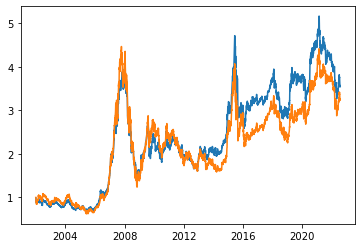

In [109]:
plt.plot(sh000300["date"], sh000300["d4"])
plt.plot(sh000300["date"], sh000300["close"]/1316.455)

In [6]:
pct300 = sh000300["close"].pct_change()

In [8]:
(pct300 + 1).cumprod()

0            NaN
1       0.989084
2       0.981966
3       0.966721
4       0.973266
          ...   
4979    3.283116
4980    3.227248
4981    3.260716
4982    3.243058
4983    3.254044
Name: close, Length: 4984, dtype: float64

In [9]:
4283/1316

3.2545592705167175